### Class 4

##### 1. Refresh on the determinant, the rank and the inverse of a matrix
##### 2. Solving a linear systems: solving it by using the inverse matrix, and solving it by using the `solve` method from SciPy
##### 3. Geometric interpretation of the equations through graphs
##### 4. Examples of linear systems with a unique solutions, linear systems with an infinite number of solutions, and inconsistent linear systems
##### 5. The matrix rank and its relationship with the consistency of the linear system

In [2]:
import numpy as np
import scipy.linalg as sp #library to solve linear systems
import matplotlib.pyplot as plt #library for plot

###### 1. Refresh on the determinant, the rank and the inverse of a matrix

In [4]:
A = np.array([[2,4,6],[1,0,3],[0,1,1]]) 
print(A)                         

print(np.linalg.det(A))          # Determinant
print(np.linalg.matrix_rank(A))  # Rank
print("The inverse is")
print(np.linalg.inv(A))          # Inverse of A. Recall that the determinant has to be different from zero in order for the inverse to exist  

[[2 4 6]
 [1 0 3]
 [0 1 1]]
-4.0
3
The inverse is
[[ 0.75 -0.5  -3.  ]
 [ 0.25 -0.5  -0.  ]
 [-0.25  0.5   1.  ]]


In [5]:
# Let us construct a matrix that is not full rank

x = np.array([2,4,6,1])
print(x)
y = np.array([1,0,3,2])
print(y)

D = np.array([x,y])   
#D = np.array([[2,4,6,1],[1,0,3,2]])  
print(D)  
# D is made by the two vectors x,y
print(np.linalg.matrix_rank(D))    

z = 0.5*x + 2*y                             # z is a linear combination of x,y
print(z)

D = np.array([x,y,z]) 
print(D)                             # Re-define D by including also the vector z
print(np.linalg.matrix_rank(D))      # D is 3x4, however it has rank equal to 2 since z is a linear combination of x and y

[2 4 6 1]
[1 0 3 2]
[[2 4 6 1]
 [1 0 3 2]]
2
[3.  2.  9.  4.5]
[[2.  4.  6.  1. ]
 [1.  0.  3.  2. ]
 [3.  2.  9.  4.5]]
2


In [6]:
# Let's verify that A@A^(-1)  =  A^(-1)@A   =I
print(A)
Ainv = np.linalg.inv(A);
print(Ainv)
left_side = A@Ainv
right_side = Ainv@A

[[2 4 6]
 [1 0 3]
 [0 1 1]]
[[ 0.75 -0.5  -3.  ]
 [ 0.25 -0.5  -0.  ]
 [-0.25  0.5   1.  ]]


In [7]:
print(left_side)
print(right_side)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [8]:
print(left_side == right_side)
print(A@Ainv == Ainv@A)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


###### 2. Solving a linear systems: solving it by using the inverse matrix, and solving it by using the `solve` method from SciPy

In [11]:
# Linear Systems: the case where the matrix A is nxn (# of unknowns equal to # of equations)

# The system is made up of two equations:
# 1.   x+2y=1
# 2.  3x+4y=1

A = np.array([[1,2],[3,4]])
print(A)
b = np.array([[1],[1]])                      # We want to find the 2x1 vector x such that Ax=b
print(b)

[[1 2]
 [3 4]]
[[1]
 [1]]


In [15]:
# 1°method: solving it by using the invrse matrix (x=A^{-1}b)

print(np.linalg.det(A))          # Det(A) is different from zero, thus we can compute the inverse
A_inv = np.linalg.inv(A)
print(A_inv)
x1 = A_inv@b
print(x1)

# Let's verify that x1 is a solution
print(A@x1)                      # Should be equal to b

-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
[[-1.]
 [ 1.]]
[[1.]
 [1.]]


###### 2° method: solving it by using the `solve` method from SciPy

In [16]:
# 2° method: solving it using the `solve` method from SciPy

sol2 = sp.solve(A,b)
print(sol2)                       # It is equal to x1

[[-1.]
 [ 1.]]


### 3. Geometric interpretation of the equations through graphs

In [22]:
# The previous system consists of two equations:
# 1.   x+2y=1 --> y = (1 -x)\2
# 2.  3x+4y=1 --> y = (1-3x)\4

# First we are going to define x and the two equations
xPlt = np.linspace(-5,5,100)
yPlt1 = (1-xPlt)/2
yPlt2 = (1-3*xPlt)/4

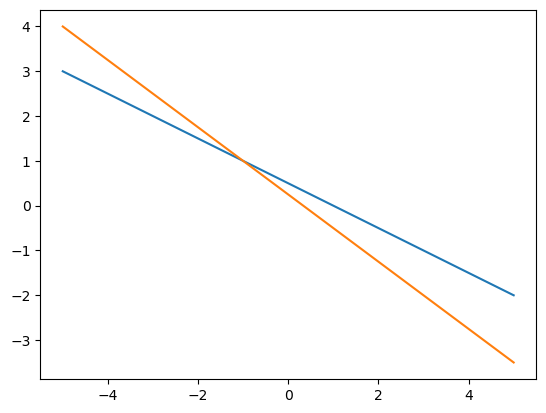

In [23]:
# Let's draw their graphs 

plt.plot(xPlt,yPlt1)
plt.plot(xPlt,yPlt2)

### 4. Examples of linear systems with a unique solutions, linear systems with an infinite number of solutions, and inconsistent linear systems

In [28]:
# 1°example: linear systems with a unique solutions
# Example 20 in the slides
# The system is
# 1.   x+y=0
# 2.   x-y=0

A = np.array([[1,1],[1,-1]])
print(A)
b = np.zeros((2,1))
print(b)
print(np.linalg.det(A))          

# The matrix A has determinant equal to 2, hence it is full rank. 
# Since the system is homogeneous, it has a unique solution given by [0,0] (trivial solution)

[[ 1  1]
 [ 1 -1]]
[[0.]
 [0.]]
-2.0


In [29]:
# Let's draw their graphs 

yPlt1  = -xPlt
yPlt2 = xPlt

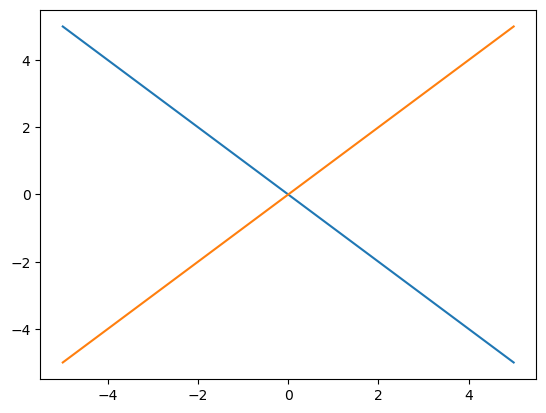

In [30]:
# Let's draw their graphs 
plt.plot(xPlt,yPlt1)
plt.plot(xPlt,yPlt2)

In [31]:
# Example 20: using the linalg.solve method of SciPy

xy = sp.solve(A,b)
print(xy)                    

[[ 0.]
 [-0.]]


In [33]:
# 2°example: linear systems with an infinite number of solutions
# Example 21 in the slides
# The system is
# 1.   x-y=0
# 2.  2x-2y=0

A = np.array([[1,-1],[2,-2]])
b = np.zeros((2,1)) 

print(np.linalg.det(A))          

# The matrix A has determinant equal to zero, hence its rank is 1. 
# Since the system is homogeneous it is consistent, and it has ∞^1 solutions by virtue of the Rouche-Capelli theorem
# We cannot use linalg.solve method of SciPy because Python gives an error

0.0


In [34]:
# Let's draw their graphs

yPlt1  = xPlt
yPlt2 = (2/2)*xPlt

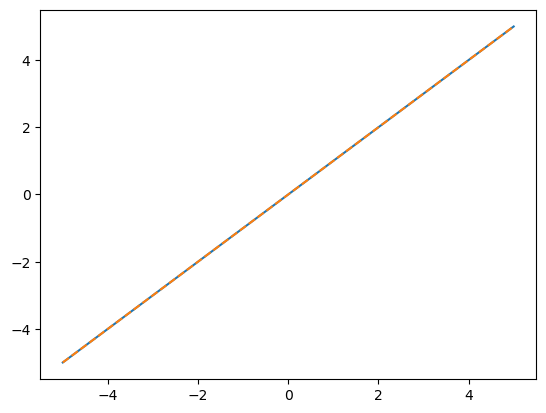

In [35]:
plt.plot(xPlt,yPlt1)
plt.plot(xPlt,yPlt2,'--')

###### 3°example: inconsistent linear systems

In [37]:
# 3°example: inconsistent linear systems
# Example 22 in the slides
# The system is:
# 1.   x-y=0
# 2.   x-y=1

A = np.array([[1,-1],[1,-1]])
b = np.array([0,1])
b.shape = (2,1)

print(np.linalg.det(A))        

# A has determinant equal to zero, hence its rank is 1.
# Let's compute the rank of the augmented matrix A|b

Ab = np.concatenate((A,b),axis=1)      # Augmented matrix A|b
print(np.linalg.matrix_rank(Ab))       # Rank of the augmented matrix

# The rank of A|b is equal to 2, therefore by the Rouche-Capelli theorem the system is inconsistent (it has no solutions)

0.0
2


In [38]:
# Let's draw their graphs 

yPlt1  = xPlt
yPlt2 = xPlt-1

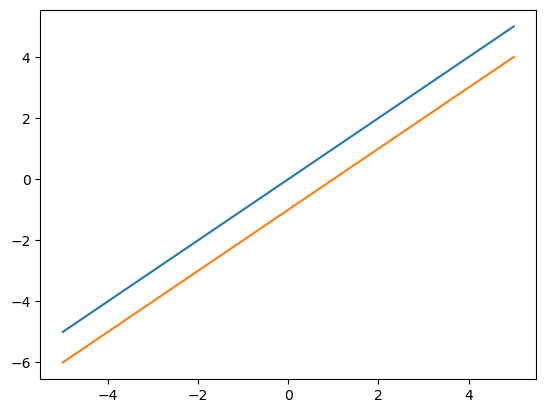

In [39]:
plt.plot(xPlt,yPlt1)
plt.plot(xPlt,yPlt2)

### 5. The Rouche-Capelli Theorem

In [40]:
# An exercise with higher dimensions

A = np.array([[1,2,0],[3,4,9],[4,6,9]])
b = np.ones((3,1))

print(np.linalg.det(A))        

# The determinant is zero, meaning that A is not invertible. 
# Let's check whether the system is consistent or not using the Rouche-Capelli theorem

print(np.linalg.matrix_rank(A))        # Rank of A
Ab = np.concatenate((A,b),axis=1)      # Augmented matrix A|b
print(np.linalg.matrix_rank(Ab))       # Rank of augmented matrix

# The two ranks are different, hence the system is inconsistent (there are no solutions)

0.0
2
3


In [41]:
# Let's now consider the same matrix A, but a different vector of coefficients 

z = np.array([1,1,2])                    # So, we want to find the vector x such that Ax=z
z.shape = (3,1) 

Az = np.concatenate((A,z),axis=1)       # Augmented matrix A|z
print(np.linalg.matrix_rank(Az)) 

# This time A and A|z have the same rank, equal to 2. The system is consistent with ∞^1 solutions
# To find the solutions, we have to use a resolution method, like the Gauss elimination algorithm

2


In [42]:
# The case where the matrix A is mxn, with m different from n

A = np.array([[1,2],[3,4],[4,6]])
print(A)
b = np.ones((3,1))

# We apply the Rouche-Capelli theorem to verify whether the system is consistent or not

print(np.linalg.matrix_rank(A))        # Rank of A
Ab = np.concatenate((A,b),axis=1)      # Augmented matrix A|b
print(np.linalg.matrix_rank(Ab))       # Rank of augmented matrix

# The two ranks are different, therefore the system is inconsistent (there are no solutions)

[[1 2]
 [3 4]
 [4 6]]
2
3


In [43]:
# To see why, let's plot the three equations:
# 1.   x+2y=1
# 2.  3x+4y=1
# 3.  4x+6y=1

xPlt = np.linspace(-5,5,100) 
yPlt1  = (1-xPlt)/2
yPlt2 = (1-3*xPlt)/4
yPlt3 = (1-4*xPlt)/6

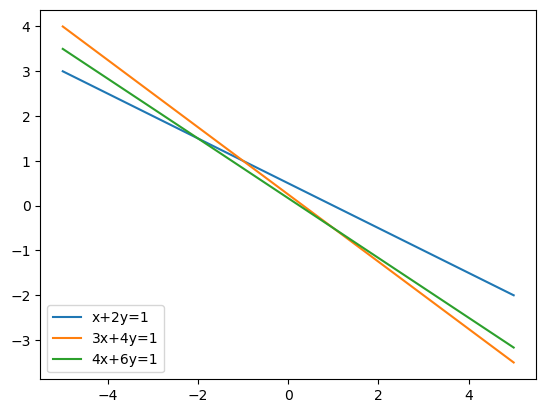

In [44]:
plt.plot(xPlt,yPlt1,label='x+2y=1')
plt.plot(xPlt,yPlt2,label='3x+4y=1')
plt.plot(xPlt,yPlt3,label='4x+6y=1')
plt.legend(loc='lower left')

In [45]:
# Another example with a rectangular matrix

A = A.transpose()
z = np.array([1,1])                    # So, we want to find the vector x such that Ax=z
z.shape = (2,1) 

# We already know the rank of A, why?
Az = np.concatenate((A,z),axis=1)       # Augmented matrix A|z
print(np.linalg.matrix_rank(Az))       # Rank of augmented matrix

# A and Az have the same rank, therefore the system is consistent with ∞^1 solutions

2
